# Character Shifts in Harry Potter Fanfics

# Character Name Distributions

### Last updated: 19.01.2022

### 1. Required Libraries

In [65]:
import glob
import os
import nltk
from nltk import FreqDist
from string import punctuation
import numpy as np
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.feature_extraction.text import CountVectorizer
import pickle

In [66]:
path_data = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\data'
path_corpora = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\corpora'
path_pickled = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\results\pickled'
path_cooccurrences = r'Z:\Fanfiction\HP_Character-Distribution\pamphlet_character_shifts\results\cooccurrences'

### 2. Read in Dictionary

In [67]:
file = open(path_data + '\\entities\\full_names.csv')
contents = file. read()
full_names_dict = ast.literal_eval(contents)

In [68]:
file = open(path_data + '\\entities\\entities.csv')
contents = file. read()
names_dict = ast.literal_eval(contents)

In [69]:
# Sort the synonyms by decreasing length (so that "Albus Dumbledore" is, for example, checked before "Albus")
# Note: Proper names can be tricky, because some of them are ambiguously used in the text (e.g. Barty Crouch Junior & Senior). 

sorted_names_full_names = {}
for name, synonyms in full_names_dict.items():
    sorted_synonyms = list(sorted(synonyms, key = len, reverse = True))
    sorted_synonyms = [each_string.lower() for each_string in sorted_synonyms]
    sorted_names_full_names[name]= sorted_synonyms

In [70]:
sorted_names = {}
for name, synonyms in names_dict.items():
    sorted_synonyms = list(sorted(synonyms, key = len, reverse = True))
    sorted_synonyms = [each_string.lower() for each_string in sorted_synonyms]
    sorted_names[name]= sorted_synonyms

### 3. Frequency Distributions

In [71]:
with open(path_pickled + '\\hp_originals_texts_tokenized.pkl', 'rb') as f:
    corpusHPoriginals_tokenized = pickle.load(f)
    
with open(path_pickled + '\\hp_ffs_texts_tokenized.pkl', 'rb') as f:
    corpusHPFFs_tokenized = pickle.load(f)

In [72]:
freq_dists_originals = [0]*len(corpusHPoriginals_tokenized)
i = 0

for book in corpusHPoriginals_tokenized:
    freq_dists_originals[i] = FreqDist(book)
    i += 1

In [73]:
freq_dists_ffs = [0]*len(corpusHPFFs_tokenized)
i = 0

for book in corpusHPFFs_tokenized:
    freq_dists_ffs[i] = FreqDist(book)
    i += 1

In [74]:
freq_names_original = {}

for freq_dist in freq_dists_originals:
    for name, synonyms in names_dict.items():
        freq_names_original.setdefault(name, [])
        freq_names_original[name].append(freq_dist[name])

In [75]:
freq_names_ffs = {}
i = 0

for freq_dist in freq_dists_ffs:
    for name, synonyms in names_dict.items():
        freq_names_ffs.setdefault(name, [])
        freq_names_ffs[name].append(freq_dist[name])
    i += 1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361


3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006


In [76]:
for name, counts in freq_names_original.items():
    all_counts = sum(counts)
    freq_names_original[name].append(all_counts)

In [77]:
for name, counts in freq_names_ffs.items():
    all_counts = sum(counts)
    freq_names_ffs[name].append(all_counts)

In [78]:
sorted_values_originals = sorted(freq_names_original.items(), key = lambda item: item[1][7], reverse = True)
sorted_dict_originals = dict(sorted_values_originals)

In [79]:
sorted_values_ffs = sorted(freq_names_ffs.items(), key = lambda item: item[1][5077], reverse = True)
sorted_dict_ffs = dict(sorted_values_ffs)

### 4. Plotting

In [93]:
df_plot_originals = pd.DataFrame(sorted_dict_originals)
df_plot_originals = df_plot_originals.transpose()
df_plot_originals.index.name = 'character_name'
df_plot_originals.reset_index(inplace = True)

In [94]:
df_plot_ffs = pd.DataFrame(sorted_dict_ffs)
df_plot_ffs = df_plot_ffs.transpose()
df_plot_ffs.index.name = 'character_name'
df_plot_ffs.reset_index(inplace = True)

In [95]:
word_count_originals = 7143491
word_count_ffs = 684747284

In [96]:
df_plot_originals['relative_count'] = (100/word_count_originals)*df_plot_originals[7]

In [97]:
df_plot_originals

,character_name,0,1,2,3,4,5,6,7,relative_count
0,HARRY_POTTER,1387,1690,2105,3236,4304,2862,3303,18887,0.264395
1,RON_WEALSEY,428,699,775,1028,1298,886,1192,6306,0.088276
2,HERMINE_GRANGER,280,339,673,868,1338,704,1240,5442,0.076181
3,ALBUS_DUMBLEDORE,162,166,164,599,655,1055,662,3463,0.048478
4,RUBEUS_HAGRID,367,167,258,371,458,233,172,2026,0.028361
...,...,...,...,...,...,...,...,...,...,...
343,OSWALD_BEAMISH,0,0,0,0,0,0,0,0,0.000000
344,ROVENA_RAVENCLAW,0,0,0,0,0,0,0,0,0.000000
345,RUBY,0,0,0,0,0,0,0,0,0.000000
346,SUMMBERBY,0,0,0,0,0,0,0,0,0.000000


In [98]:
df_plot_originals.to_csv(path_cooccurrences + '\\freq_names_originals.csv', sep = ';', encoding = 'utf-8')

In [99]:
df_plot_ffs

,character_name,0,1,2,3,4,5,6,7,8,...,5068,5069,5070,5071,5072,5073,5074,5075,5076,5077
0,HARRY_POTTER,11,2,3,0,0,2,58,12,99,...,45,12,10,73,45,60,0,1,17,595344
1,DRACO_MALFOY,0,0,96,71,28,26,29,10,54,...,7,32,16,19,14,35,8,3,9,363216
2,HERMINE_GRANGER,10,7,16,13,4,7,20,7,12,...,10,9,4,13,9,6,10,9,16,303937
3,SEVERUS_SNAPE,0,1,42,12,5,44,34,22,8,...,8,35,7,5,1,3,3,8,6,290499
4,RON_WEALSEY,3,0,0,0,0,0,8,6,3,...,5,0,0,2,5,8,0,0,1,114928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,KENNETH_BRANAH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344,LADISLAW_ZAMOJSKI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,RODDY_PONTNER,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346,SUMMBERBY,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df_plot_ffs['relative_count'] = (100/word_count_ffs)*df_plot_ffs[5077]

In [101]:
df_plot_ffs.to_csv(path_cooccurrences + '\\freq_names_ffs.csv', sep = ';', encoding = 'utf-8')

In [102]:
top_originals = df_plot_originals.sort_values(by = ['relative_count'], ascending = False)
top_originals.to_csv(path_cooccurrences + '\\sorted_originals.csv', sep = ';')
top_ffs = df_plot_ffs.sort_values(by = ['relative_count'], ascending = False)
top_ffs.to_csv(path_cooccurrences + '\\sorted_ffs.csv', sep = ';')

In [103]:
top_originals = top_originals.head(50)
top_ffs = top_ffs.head(50)

In [104]:
top_originals

,character_name,0,1,2,3,4,5,6,7,relative_count
0,HARRY_POTTER,1387,1690,2105,3236,4304,2862,3303,18887,0.264395
1,RON_WEALSEY,428,699,775,1028,1298,886,1192,6306,0.088276
2,HERMINE_GRANGER,280,339,673,868,1338,704,1240,5442,0.076181
3,ALBUS_DUMBLEDORE,162,166,164,599,655,1055,662,3463,0.048478
4,RUBEUS_HAGRID,367,167,258,371,458,233,172,2026,0.028361
5,SEVERUS_SNAPE,179,103,272,267,388,414,345,1968,0.027550
6,VOLDEMORT,57,179,70,285,268,440,536,1835,0.025688
7,DRACO_MALFOY,128,218,183,140,200,414,121,1404,0.019654
8,SIRIUS_BLACK,1,0,148,212,653,57,71,1142,0.015987
9,FRED_WEASLEY,34,101,79,187,324,80,93,898,0.012571


In [105]:
top_originals.to_csv(path_cooccurrences + '\\top_originals.csv', sep = ';')

In [106]:
top_ffs

,character_name,0,1,2,3,4,5,6,7,8,...,5069,5070,5071,5072,5073,5074,5075,5076,5077,relative_count
0,HARRY_POTTER,11,2,3,0,0,2,58,12,99,...,12,10,73,45,60,0,1,17,595344,0.086944
1,DRACO_MALFOY,0,0,96,71,28,26,29,10,54,...,32,16,19,14,35,8,3,9,363216,0.053044
2,HERMINE_GRANGER,10,7,16,13,4,7,20,7,12,...,9,4,13,9,6,10,9,16,303937,0.044387
3,SEVERUS_SNAPE,0,1,42,12,5,44,34,22,8,...,35,7,5,1,3,3,8,6,290499,0.042424
4,RON_WEALSEY,3,0,0,0,0,0,8,6,3,...,0,0,2,5,8,0,0,1,114928,0.016784
5,ALBUS_DUMBLEDORE,0,0,0,0,0,0,8,2,6,...,8,2,11,8,1,1,0,0,110492,0.016136
6,SIRIUS_BLACK,0,0,0,8,1,1,20,18,20,...,1,3,2,4,1,1,0,3,102146,0.014917
7,JAMES_POTTER,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,95640,0.013967
8,VOLDEMORT,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,94815,0.013847
9,GINNY_WEASLEY,0,0,0,0,0,0,5,12,0,...,0,0,2,1,4,0,0,0,86843,0.012682


In [107]:
top_ffs.to_csv(path_cooccurrences + '\\top_ffs.csv', sep = ';')

In [108]:
df_plot_overall = top_originals[['character_name', 'relative_count']]
df_plot_ffs = top_ffs[['character_name', 'relative_count']]

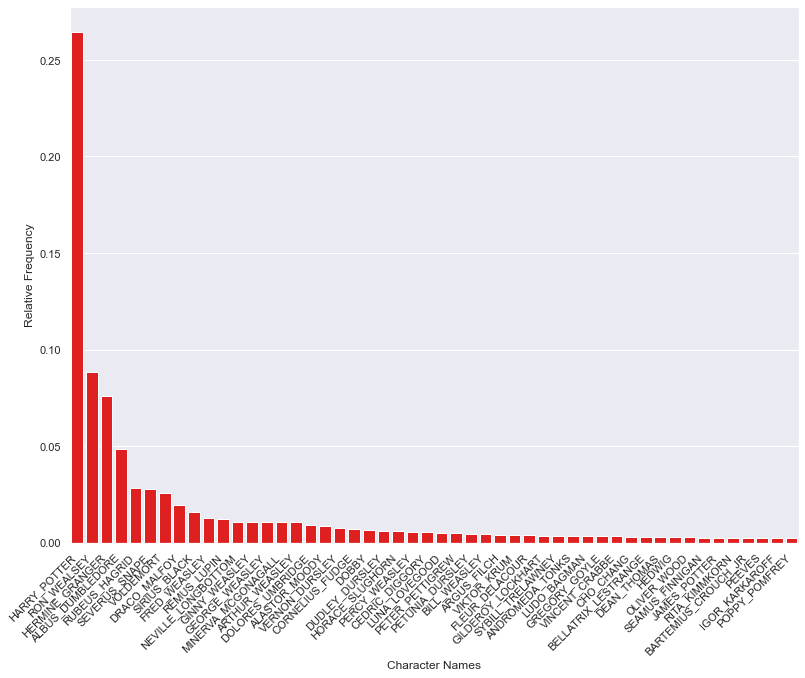

In [109]:
sns.set_theme(style = 'whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

g = sns.barplot(
    data = df_plot_overall, x = 'character_name', y = 'relative_count',
    color = 'red')

g.set(xlabel = 'Character Names', ylabel = 'Relative Frequency')

plt.tight_layout()
plt.xticks(rotation = 45, ha = 'right')
plt.show()

fig = g.get_figure()
fig.savefig(path_cooccurrences + '\\originals_top_characters.png', dpi=300, bbox_inches = 'tight')

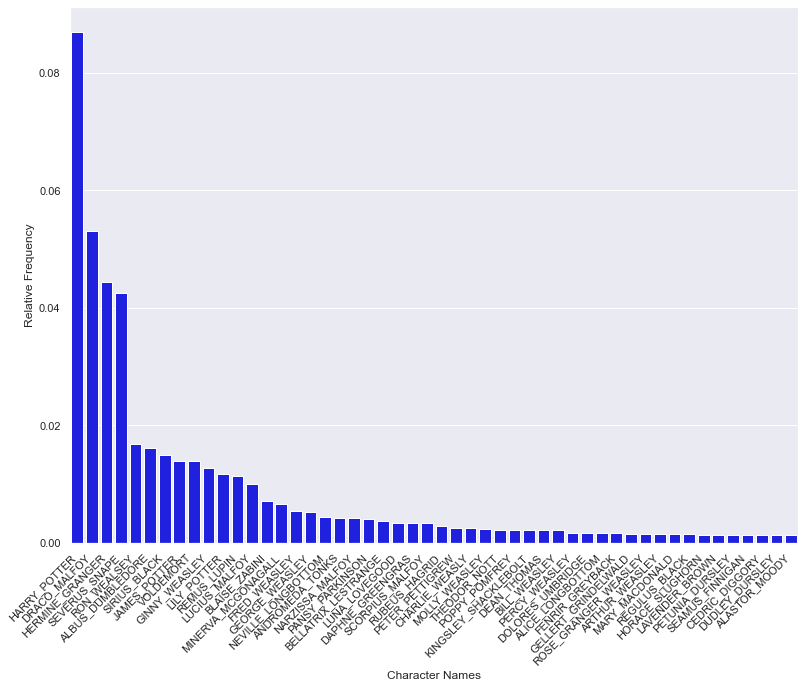

In [110]:
sns.set_theme(style = 'whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

g = sns.barplot(
    data = df_plot_ffs, x = 'character_name', y = 'relative_count',
    color = 'blue')

g.set(xlabel = 'Character Names', ylabel = 'Relative Frequency')

plt.tight_layout()
plt.xticks(rotation = 45, ha = 'right')
plt.show()

fig = g.get_figure()
fig.savefig(path_cooccurrences + '\\ffs_top_characters.png', dpi=300, bbox_inches = 'tight')